## 1. Revise how to use a pre-trained model
## 2. Create the logic for photo org application

In [1]:
from PIL import Image
path_img ="/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data/8434755771_960a1e9572_o.jpg"

In [2]:
img = Image.open(path_img)

In [7]:
img.size

(931, 500)

In [4]:
import torchvision.models as models

/Users/gunnvantsaini/miniforge3/envs/dl/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [5]:
Vgg16 = models.vgg16(pretrained=True)

In [6]:
Vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
import torchvision.transforms as transforms

In [10]:
## resize
## tensor
## normalise
transform_pipeline = transforms.Compose([transforms.Resize((224,224)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

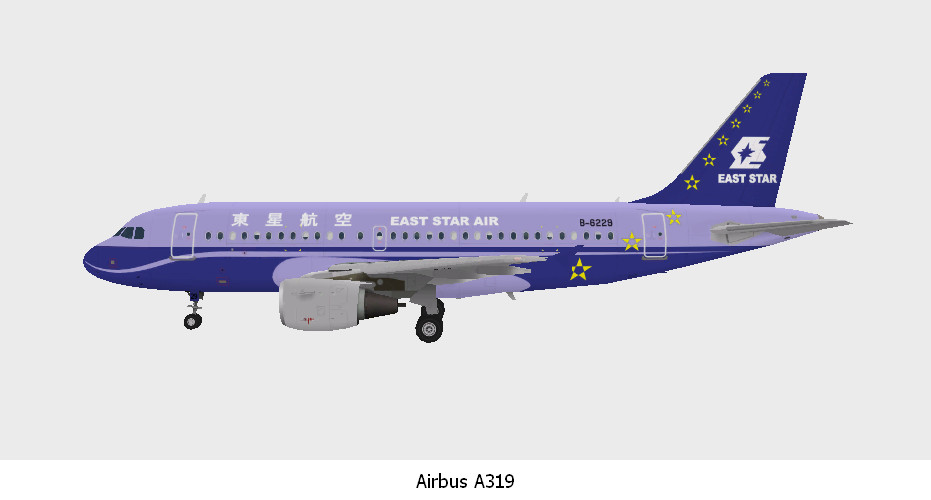

In [11]:
img

In [12]:
img_norm = transform_pipeline(img)

In [15]:
img_norm.size()

torch.Size([3, 224, 224])

In [18]:
img_norm = img_norm.unsqueeze(0)

In [28]:
Vgg16(img_norm).argmax().item()

404

In [29]:
import pandas as pd
labels = pd.read_csv("../Codes/data/vgg16_model_labels.csv",header=None)

In [27]:
### 1. PIL, read image
### 2. Transform
### 3. Add extra dim
### 4. Prediction (argmax())
### 5 Label from label file

In [34]:
def get_predictions(path_img):
    img = Image.open(path_img)
    img = transform_pipeline(img)
    img = img.unsqueeze(0)
    idx = Vgg16(img).argmax().item()
    return labels[1].iloc[idx]

In [35]:
get_predictions('/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data/9885418994_d976c98902_o.jpg')

'Italian greyhound'

In [36]:
## How do I get path of all the files in a folder?
import os

In [38]:
img_names = os.listdir('/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data')

In [39]:
img_names[0]

'15843999703_2423e96bd6_o.jpg'

In [40]:
path_folder = '/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data'

In [41]:
os.path.join(path_folder,img_names[0])

'/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data/15843999703_2423e96bd6_o.jpg'

In [42]:
from tqdm import tqdm
paths = []
predictions = []
for img_name in tqdm(img_names):
    path_img = os.path.join(path_folder,img_name)
    prediction = get_predictions(path_img)
    predictions.append(prediction)
    paths.append(path_img)   

100%|█████████████████████████████████████████| 578/578 [03:51<00:00,  2.50it/s]


In [44]:
source_table = pd.DataFrame({'paths':paths,'labels':predictions})

In [45]:
source_table.head()

,paths,labels
0,/Users/gunnvantsaini/Documents/Data/Work/ML Co...,airliner
1,/Users/gunnvantsaini/Documents/Data/Work/ML Co...,miniature pinscher
2,/Users/gunnvantsaini/Documents/Data/Work/ML Co...,Chihuahua
3,/Users/gunnvantsaini/Documents/Data/Work/ML Co...,Chihuahua
4,/Users/gunnvantsaini/Documents/Data/Work/ML Co...,Chihuahua


In [47]:
summary = source_table['labels'].value_counts()

In [53]:
folder_names = summary[summary>20].index.tolist()

In [55]:
folder_names = [name.split(",")[0] for name in folder_names]

In [56]:
folder_names

['airliner',
 'Chihuahua',
 'church',
 'violin',
 'tabby',
 'German shepherd',
 'laptop']

In [59]:
base_path = '/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data'
name_folder = 'airliner'
path_folder = os.path.join(base_path,name_folder)
os.mkdir(path_folder)

In [62]:
source_table[source_table['labels']=='airliner']['paths'].iloc[0]

'/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/final_data/15843999703_2423e96bd6_o.jpg'

In [64]:
src_photo = source_table[source_table['labels']=='airliner']['paths'].iloc[0]

In [66]:
name_photo = src_photo.split("/")[-1]

In [68]:
target_path = os.path.join(path_folder,name_photo)

In [63]:
import shutil

In [69]:
shutil.copyfile(src_photo,target_path)

'/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/airliner/15843999703_2423e96bd6_o.jpg'

In [71]:
source_table['labels'].value_counts()

airliner                                                             147
Chihuahua                                                             76
church, church building                                               70
violin, fiddle                                                        67
tabby, tabby cat                                                      60
German shepherd, German shepherd dog, German police dog, alsatian     32
laptop, laptop computer                                               26
acoustic guitar                                                       16
tiger cat                                                             12
notebook, notebook computer                                            9
Arabian camel, dromedary, Camelus dromedarius                          9
cello, violoncello                                                     9
Egyptian cat                                                           5
airship, dirigible                                 